# 3. Regresión con Scikit-Learn

   <a id="split_train_test"></a>  
## Dividir datos en subconjuntos usando Scikit-Learn

Dividir los datos en conjuntos de `X_train`, `y_train` y validación es una tarea repetitiva; deberá realizar la división cada vez que ejecute sus modelos de aprendizaje automático. Scikit-learn tiene una función `train_test_split()` incorporada que permite dividir los datos en conjuntos de datos más pequeños.

Generalmente, esta función recibe tres parámetros importantes:

* `arrays` - los datos que se quieren dividir. 
* `test_size` - el tamaño del conjunto de prueba es la proporción de los datos originales que se quieren usar como conjunto de prueba. 
* `random_state` - inicializa la "semilla" para la función aleatoria utilizada para dividir el conjunto de datos (es util si se quieren comparar diferentes algoritmos y se desea dar a los métodos la misma "oportunidad").

Luego, la función `train_test_split()` devuelve los conjuntos de datos divididos. 

El uso de esta función con los datos de precios de la vivienda se explicará a partir del siguiente ejemplo. 

En primer lugar. como siempre, se importan las bibliotecas y los datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/kc_house_data_final.csv',sep=',')

In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'year_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'city', 'year', 'month', 'day'],
      dtype='object')

Se puede comenzar con un caso simple y usar solo una característica (tamaño de la casa: `df['sqft_living']`) y el objetivo (precio de la vivienda: `df['price']`). Es común en el aprendizaje automático usar la letra mayúscula `X` para asignar las características y la letra minúscula `y` para asignar el objetivo (tenga en cuenta que se usan corchetes dobles (solo para seguir el formato que requiere scikit-learn)).

In [4]:
X = df[['sqft_living']].to_numpy()
y = df[['price']].to_numpy()

Se verifica la dimensión de cada variable (ambas tienen que tener el mismo número de filas) 

In [5]:
X.shape

(21537, 1)

In [6]:
y.shape

(21537, 1)

Ahora, se dividen las filas de los datos `X` y `Y` en cuatro subconjuntos llamados `X_train`, `X_test` y `y_train`, `y_test`. Con el parámetro `test_size=0.2` se hace que el 20 % de los datos totales estén en subconjunto para pruebas: `X_test` y `y_test` y 80 % de los datos totales estén en subconjunto para entrenamiento `X_train` y `y_train`. El tamaño del subconjunto de prueba siempre es más pequeño que el tamaño del subconjunto de entrenamiento, y suele estar entre el 10 % y el 30 % de los datos totales.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

In [9]:
print(X_train.shape)
print(y_train.shape)

(17229, 1)
(17229, 1)


In [10]:
print(X_test.shape)
print(y_test.shape)

(4308, 1)
(4308, 1)


In [11]:
X_test.shape[0]/X.shape[0]

0.20002785903329154

<a id="scaling_normalization"></a>  
## Escalado y normalización de datos


La estandarización es un método útil para escalar variables independientes, de modo que tenga una distribución con 0 valor medio y varianza igual a 1. 

La fórmula matemática para la estandarización, como se menciona en el ejercicio, es la siguiente:

$$ x_{nuevo}=\frac{x_{i} - \mu}{\sigma} $$

Explicación: tome cada elemento de una matriz en una columna dada y reste de ese elemento un valor medio de todos los elementos de esa columna y el resultado divídalo por la desviación estándar de todos los elementos de esa columna. Se debe hacer la misma operación con todos los elementos de todas las columnas.

Pero en lugar de escribir su propio código, se pueden usar los métodos Scikit-Learn que proporcionan una mayor flexibilidad.

Estandarización es una buena opción si los puntos de sus datos no están distribuidos normalmente, es decir, no siguen la distribución gaussiana.


En consecuencia, la estandarización es importante si se tienen muchas características o al menos dos. Ahora se está viendo el problema unidimensional porque se está teniendo en cuenta solo el tamaño de la casa; sin embargo, se estandarizará este valor solo para ver cómo funciona.

Hay varios escaladores en la biblioteca Scikit Learn (StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler), pero el más común es el StandardScaler o Escalador Estándar (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) que se refiere a la fórmula anterior. Para escalar el conjunto de datos en sentido columna, simplemente, se puede usar:

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#X=(X-X.mean())/(X.std())

* `scaler=StandardScaler()`: inicialmente cree un objeto `scaler` de la función `StandardScaler()`.

* `X_train=scaler.fit_transform(X_train)` utilice `fit_transform()` junto con el objeto asignado para transformar los datos y estandarizarlos.`fit_transform()`: hace el proceso en dos pasos: `fit`: encuentra el valor medio y la desviación estándar del conjunto de datos X_train, `transform`: resta la media (encontrada) de cada valor de la columna dada y divide el resultado por la desviación estándar. Este proceso se llama transformación.

* `X_test=scaler.transform(X_test)` el mismo proceso debe aplicarse a los datos `X_test` con la diferencia de que no se vuelve a hacer el `fit`, sino que se usan los medios y la desviación estándar del conjunto de datos `X_train`.

Después de la estandarización se puede ver que los datos tienen media 0 y desviación estándar =1:

In [13]:
X_train[0:10]

array([[ 1.20673884e-01],
       [ 4.95240891e-01],
       [-9.96596488e-02],
       [ 8.69807897e-01],
       [-1.01404381e+00],
       [-3.97109919e-01],
       [-5.09558862e-04],
       [-2.75926475e-01],
       [ 1.45369176e+00],
       [-9.36927075e-01]])

In [14]:
print(np.mean(X_train))
print(np.std(X_train))

-6.68105654380035e-17
1.0


Y puede visualizarse con seaborn:

/home/michal/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

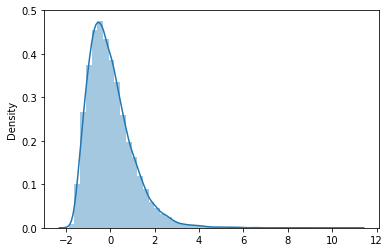

In [15]:
import seaborn as sns
sns.distplot(X_train[:,0])

   <a id="univariate_regression"></a>  
## Scikit-Learn para el problema de regresión univariante - método: `LinearRegression`

Luego de tener los datos divididos y estandarizados, se puede usar scikit learn para realizar el ajuste. Lo que se hace es importar el módulo `LinearRegression` del modelo lineal de scikit-learn.

In [16]:
from sklearn.linear_model import LinearRegression

Se intancia el objeto `linear_model`, que permitirá hacer el ajuste, verificar la precisión y comprobar la bondad del ajuste

In [17]:
linear_model = LinearRegression()

El entrenamiento del modelo se realiza simplemente usando el método `fit` y pasando el par de datos de entrenamiento `X_train` y `y_train`

In [18]:
linear_model.fit(X_train, y_train)

LinearRegression()

Una vez que finaliza el entrenamiento, se puede usar el otro par de subconjuntos de datos que no participaron en el proceso de entrenamiento `X_test` e `y_test` para verificar imparcialmente qué tan bien ha aprendido el modelo. Para ello, se usa el método `score`. 

`score` devuelve el coeficiente de determinación $R^2$ de la predicción (introducido en el capítulo 1 de este Módulo).

In [19]:
print(f'R2: {linear_model.score(X_test, y_test):.2f}')

R2: 0.50


En realidad, scikit-learn tiene todas las métricas cuyos valores pueden obtenerse importando la función que sea de interés.

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Primero, se predecirán los precios de las casas para cada tamaño de casa en el subconjunto de prueba y comparar con los resultados verdaderos:

In [21]:
y_pred =  linear_model.predict(X_test)

r2_linreg = r2_score(y_test, y_pred)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [22]:
print("")
print(f'MAE :   {MAE_linreg:.2f}')
print(f'MSE :   {MSE_linreg:.2f}')
print(f"RMSE:   {RMSE_linreg:.2f}")
print(f"R2  :   {r2_linreg:.2f}")


MAE :   172064.42
MSE :   64792017501.34
RMSE:   254542.76
R2  :   0.50


Ahora se pronosticará el precio de la casa con el tamaño de 4000 pies cuadrados

Antes, es importante recordar dos cosas:

* El modelo fue entrenado usando valores escalados para que no se pudiera, simplemente, poner el valor `4000` pies cuadrados, sino que primero deba escalarse usando el escalador.
* Los datos que se escalaron originalmente `X_train` tenían dimensión (17229, 1), por lo que para estandarizar el valor de `4000` se debe convertir en una matriz con un solo valor, cuya forma en la que la última dimensión debe ser igual de `X_train`. Así que antes de escalar el valor `4000` debe convertirse a una matriz numpy que tenga una fila y una columna. Si a esa variable se le nombra `una_casa_particular`, entonces `una_casa_particular.shape` debe volver: (1,1) (si se quisiera escalar 10 casas la forma tiene que ser (10,1), si se quiere escalar 20 casas debe ser (20,1)), lo que significa preservar la última dimensión porque el escalador lo requiere.

In [23]:
una_casa_particular=np.array([[4000]])
print(una_casa_particular.shape)
print(una_casa_particular.ndim)

(1, 1)
2


In [24]:
una_casa_particular_escalada=scaler.transform(una_casa_particular)

Ahora se puede usar el método `predict` a partir del modelo entrenado:
(el valor previsto estará en USD porque solo se escalaron las características `X`, no los objetivos `y`)

In [25]:
linear_model.predict(una_casa_particular_escalada)

array([[1081656.44623207]])

También es posible visulizar el ajuste porque el modelo permite el acceso a los valores interceptados y dependientes para esta simple regresión lineal.

In [26]:
print('Intercept: {}'.format(linear_model.intercept_))
print('Coefficients: {}'.format(linear_model.coef_))

Intercept: [537325.33878925]
Coefficients: [[256070.37369648]]


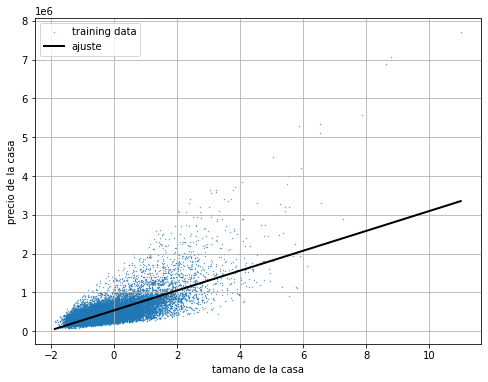

In [27]:
fig,ax=plt.subplots(1,1,figsize=(8,6))


x_new=np.linspace(np.min(X_train),np.max(X_train),100)
y_new=linear_model.intercept_ + x_new* linear_model.coef_[0]

ax.scatter(X_train,y_train, label='training data',s=0.1)
ax.plot(x_new,y_new,'-k', label='ajuste',lw=2)
ax.set_xlabel('tamano de la casa')
ax.set_ylabel('precio de la casa')
ax.grid(True)
ax.legend()

El resultado $R^2=0.5$ no es muy bueno y se puede mejorar usando más características (es obvio que  el precio de la casa no depende solo de su tamaño). 

Se visualizan algunos de los precios que se han predicho y se comparan con valores reales. Para ello, se utilizarán diccionario y módulo `tabulate` para imprimirlo en un formato agradable:

In [28]:
from tabulate import tabulate
np.random.seed(123)
random=np.random.randint(len(y_test), size=10)
random_True=[]
random_pred=[]
for i in random:
    random_True.append(y_test[i])
    random_pred.append(y_pred[i])

dict={"Price True (USD)":random_True, "Price Predict (USD)":random_pred}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid')) 

╒════════════════════╤═══════════════════════╕
│   Price True (USD) │   Price Predict (USD) │
╞════════════════════╪═══════════════════════╡
│             180000 │                514626 │
├────────────────────┼───────────────────────┤
│             538000 │                517448 │
├────────────────────┼───────────────────────┤
│             514000 │                212775 │
├────────────────────┼───────────────────────┤
│             415000 │                768803 │
├────────────────────┼───────────────────────┤
│             315000 │                432816 │
├────────────────────┼───────────────────────┤
│             443000 │                297406 │
├────────────────────┼───────────────────────┤
│             249000 │                266375 │
├────────────────────┼───────────────────────┤
│             499950 │                466669 │
├────────────────────┼───────────────────────┤
│             130000 │                173280 │
├────────────────────┼───────────────────────┤
│            

Se visualiza $R^2$ trazando el valor real del precio frente al precio previsto (`y_test` vs. `y_pred`).

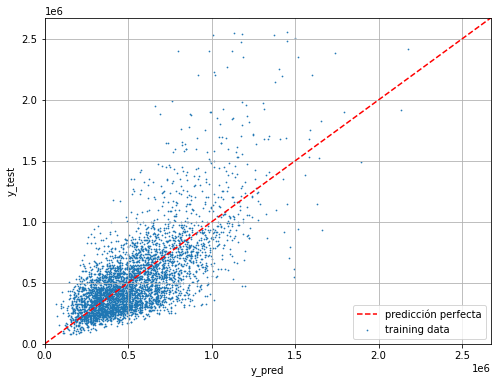

In [29]:
fig,ax=plt.subplots(1,1,figsize=(8,6))

x_ref=np.linspace(0,np.max(y_pred),100)
y_ref=np.linspace(0,np.max(y_pred),100)
ax.plot(x_ref,y_ref,'--r' ,label='predicción perfecta')

ax.scatter(y_pred,y_test, label='training data',s=0.5)

ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
ax.set_xlim(0,np.max(y_pred))
ax.set_ylim(0,np.max(y_pred))
ax.grid(True)
ax.legend()

Puede verse una gran dispersión de los puntos que se relaciona con el error que cometimos durante nuestra predicción. Si nuestra predicción fuera perfecta, se observaría una línea recta entre `y_test` e `y_pred`

   <a id="multivariate_regression"></a>  
## Scikit-Learn para el problema de regresión multivariante - método: `LinearRegression`

Se usan todas las columnas (características como: 'dormitorios', 'baños', 'sqft_living', 'sqft_lot', 'pisos', 'frente al mar', 'vista', 'condición'... etc) de nuestro conjunto de datos y se repite el procedimiento:

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,Seattle,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,Seattle,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,Kenmore,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,Seattle,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,Sammamish,2015,2,18


In [31]:
X = df[['bedrooms', 
        'bathrooms', 
        'sqft_living', 
        'sqft_lot', 
        'floors',                                 
        'waterfront', 
        'view', 
        'condition', 
        'grade', 
        'sqft_basement',
        'yr_built',
        'year_renovated',
        'zipcode',
        'lat', 
        'long',
        'sqft_living15', 
        'sqft_lot15',
        'year',
        'month',
        'day'
         ]].to_numpy()

y = df[['price']].to_numpy()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1275, test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_model_multi = LinearRegression()
linear_model_multi.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred =  linear_model_multi.predict(X_test)

r2_linreg = r2_score(y_test, y_pred)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [37]:
print("")
print(f'MAE :   {MAE_linreg:.2f}')
print(f'MSE :   {MSE_linreg:.2f}')
print(f"RMSE:   {RMSE_linreg:.2f}")
print(f"R2  :   {r2_linreg:.2f}")


MAE :   121274.02
MSE :   34081316608.80
RMSE:   184611.26
R2  :   0.74


El resultado $R^2$ es claramente mejor: $0.74$, pero realmente qué significa este valor y cómo se puede comparar con resultado anterior $R^2=0.5$. La respuesta es, posiblemente, que falta intuicion de sentido de $R^2$.

La explicación intuitiva del valor del R-Squared se puede ver con más claridad cuando se trazan los valores predichos del objetivo (`y_pred`) versus los valores verdaderos del objetivo (`y_test`) 

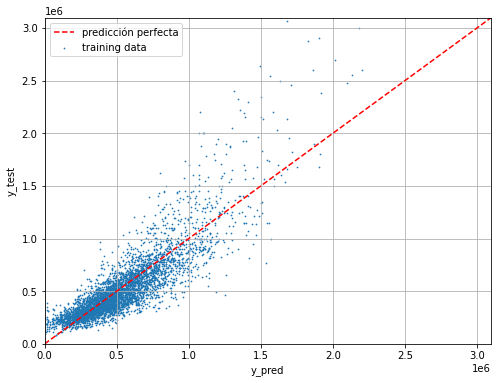

In [38]:
fig,ax=plt.subplots(1,1,figsize=(8,6))

x_ref=np.linspace(0,np.max(y_pred),100)
y_ref=np.linspace(0,np.max(y_pred),100)
ax.plot(x_ref,y_ref,'--r' ,label='predicción perfecta')

ax.scatter(y_pred,y_test, label='training data',s=0.5)

ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
ax.set_xlim(0,np.max(y_pred))
ax.set_ylim(0,np.max(y_pred))
ax.grid(True)
ax.legend()

$R^2$ se puede interpretar como la correlación al cuadrado entre los valores predichos de la variable dependiente (`y_pred`) y los valores reales de la variable dependiente (`y_test`) (cuadrado de la correlación entre los valores reales y los previstos).

Si se pudiera observar una línea perfectamente recta a partir de la relación entre `y_pred` y `y_test` eso significaría $R^2=1$ y, por lo tanto, una correlación perfecta - predicación del modelo sin error. 

No obstante, usando más características de la casa, este modelo $R^2=0.72$, que es mucho mejor, se puede mejorar aún más.

   <a id="multivariate_regression_gbr"></a>  
## Scikit-Learn para el problema de regresión multivariante - método: `RandomForestRegressor`

Los modelos de regresión lineal que hemos utilizado para predecir los precios de las viviendas (lineal univariado, lineal multivariante y Ridge) no pueden mejorar significativamente la precisión del resultado, así que se deben utilizar métodos diferentes y más sofisticados. Por esta razón, en el próximo curso se abordarán otros conceptos, tales como Decision Trees (Árboles de Decisión), Random Forest (Bosque Aleatorio) y  Redes Neuronales, que son, curiosamente, una de las técnicas de aprendizaje automático más poderosas disponibles.

Solo para motivarlos, se mostrará la mejora que puede hacerse utilizando otros métodos de machine learning, por ejemplo Random Forest Regresor.

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
tree_model = RandomForestRegressor()
tree_model.fit(X_train, y_train)

/usr/lib64/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [43]:
y_pred =  tree_model.predict(X_test)

r2_linreg = r2_score(y_test, y_pred)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [44]:
print("")
print(f'MAE :   {MAE_linreg:.2f}')
print(f'MSE :   {MSE_linreg:.2f}')
print(f"RMSE:   {RMSE_linreg:.2f}")
print(f"R2  :   {r2_linreg:.2f}")


MAE :   68948.96
MSE :   16240853830.07
RMSE:   127439.61
R2  :   0.88


El resultado $R^2=0.88$ es ya excelente y, claramente, visualiza la relación entre `y_pred` y `y_test`, donde se puede observar casi la relación linear entre las dos variables.

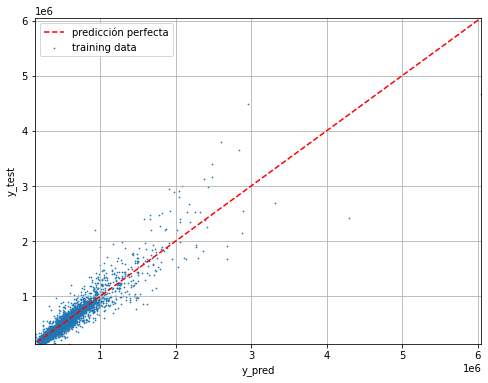

In [45]:
fig,ax=plt.subplots(1,1,figsize=(8,6))

x_ref=np.linspace(0,np.max(y_pred),100)
y_ref=np.linspace(0,np.max(y_pred),100)
ax.plot(x_ref,y_ref,'--r' ,label='predicción perfecta')

ax.scatter(y_pred,y_test, label='training data',s=0.5)
ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
ax.set_xlim(np.min(y_pred),np.max(y_pred))
ax.set_ylim(np.min(y_pred),np.max(y_pred))
ax.grid(True)
ax.legend()

Observe que la incertidumbre de las predicciones aumenta a medida que aumenta el precio de la casa.

Scikit-learn tiene muchos otros métodos y parámetros de optimización. La lista completa de métodos de aprendizaje automático scikit-learn se puede encontrar en este enlace: https://scikit-learn.org/stable/modules/classes.html. Como en este Modulo se abordó un problema de regresión, puede aplicarse cualquier método de la lista que tenga un nombre 'regressor' en ella.

# The importance of each feature for the ML model

### `eli5` (https://pypi.org/project/eli5/)  
* ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.
* we can use this package to see which features are most important

In [46]:
Xcols = ['bedrooms', 
        'bathrooms', 
        'sqft_living', 
        'sqft_lot', 
        'floors',                                 
        'waterfront', 
        'view', 
        'condition', 
        'grade', 
        'sqft_basement',
        'yr_built',
        'year_renovated',
        'zipcode',
        'lat', 
        'long',
        'sqft_living15', 
        'sqft_lot15',
        'year',
        'month',
        'day'
         ]

In [50]:
import eli5
from eli5.sklearn import PermutationImportance
model = PermutationImportance(tree_model)
model.fit(X,y)
eli5.show_weights(model, feature_names = Xcols)

Weight,Feature
0.4291 ± 0.0075,lat
0.3992 ± 0.0090,sqft_living
0.3058 ± 0.0110,grade
0.2048 ± 0.0086,long
0.0492 ± 0.0017,sqft_living15
0.0441 ± 0.0013,yr_built
0.0390 ± 0.0029,waterfront
0.0175 ± 0.0005,zipcode
0.0155 ± 0.0004,sqft_lot
0.0126 ± 0.0004,sqft_lot15


In [52]:
#!pip3 install eli5
Xcols = ['bedrooms', 
        'bathrooms', 
        'sqft_living', 
        'sqft_lot', 
        'floors',                                 
        'waterfront', 
        'view', 
        'condition', 
        'grade', 
        'sqft_basement',
        'yr_built',
        'year_renovated',
        'zipcode',
        'lat', 
        'long',
        'sqft_living15', 
        'sqft_lot15',
        'year',
        'month',
        'day'
         ]

import eli5
from eli5.sklearn import PermutationImportance
model = PermutationImportance(tree_model)
model.fit(X,y)
#eli5.show_weights(RandomForestRegressor, feature_names = Xcols)